## Wizja komputerowa    


Filtr Sobela


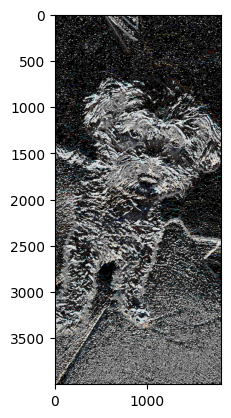

Filtr Gaussa


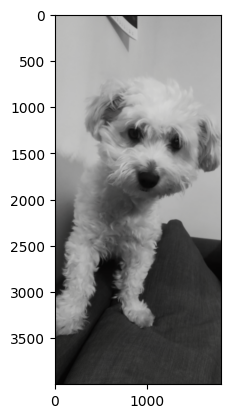

Filtr medianowy


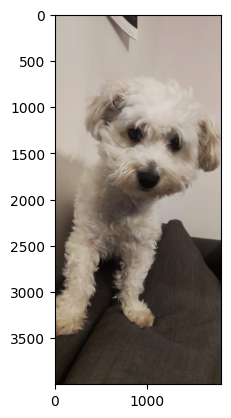

Filtr Laplace'a


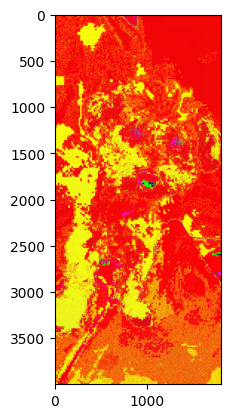

In [13]:
## Zadanie A
# 4 Gotowe metody filtrowania obrazu
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
## 1 Filtr Sobela
print("Filtr Sobela")
img = Image.open('cat.jpg')
img = np.array(img)
img = ndimage.sobel(img, axis=0)
plt.imshow(img)
plt.show()
## 2 Filtr Gaussa
print("Filtr Gaussa")
img = Image.open('cat.jpg')
img = np.array(img)
img = ndimage.gaussian_filter(img, sigma=3)
plt.imshow(img)
plt.show()
## 3 Filtr medianowy
print("Filtr medianowy")
img = Image.open('cat.jpg')
img = np.array(img)
img = ndimage.median_filter(img, size=3)
plt.imshow(img)
plt.show()
## 4 Filtr Laplace'a
print("Filtr Laplace'a")
img = Image.open('cat.jpg')
img = np.array(img)
img = ndimage.laplace(img)
plt.imshow(img)
plt.show()




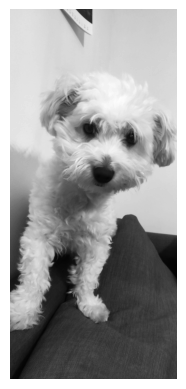

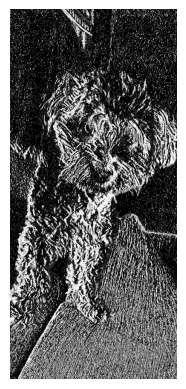

True

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_convolution(image, kernel):
    # Przygotowanie obrazu wynikowego
    result = np.zeros_like(image)

    # Pobranie rozmiarów obrazu i jądra
    image_height, image_width = image.shape[:2]
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2

    # Rozszerzenie obrazu wejściowego przy użyciu 0-paddingu
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Wykonanie konwolucji
    for y in range(image_height):
        for x in range(image_width):
            result[y, x] = np.sum(padded_image[y:y+kernel_size, x:x+kernel_size] * kernel)

    return result

# Wczytanie obrazu
image = cv2.imread('cat.jpg', 0)  # Wczytaj obraz w odcieniach szarości

# Przykładowe jądro
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Wywołanie funkcji konwolucji
output_image = apply_convolution(image, kernel)

# Wyświetl obraz
plt.imshow(image, cmap='gray')
plt.axis('off') # Wyłącz osie obrazu

# Pokaż obraz
plt.show()
# Wyświetl obraz
plt.imshow(output_image, cmap='gray')
plt.axis('off') # Wyłącz osie obrazu

# Pokaż obraz
plt.show()

# Zapisanie obrazu wynikowego do pliku
cv2.imwrite('output_image.jpg', output_image)

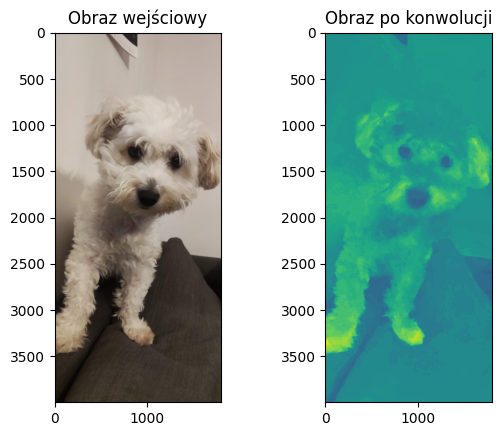

Rozmiar obrazu wynikowego: torch.Size([1, 16, 3999, 1799])


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Przykładowy obraz wejściowy (możesz użyć własnego obrazu)
input_image = Image.open("cat.jpg")

# Przykładowe hiperparametry
F = 2  # Rozmiar maski filtru
S = 1  # Stride

# Przekszałcenie obrazu PIL na tensor
transform = transforms.ToTensor()
input_tensor = transform(input_image).unsqueeze(0)  # Dodajemy wymiar batcha (1 obraz)

# Wyświetlenie obrazu wejściowego
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Obraz wejściowy")
plt.imshow(input_tensor.squeeze(0).permute(1, 2, 0))  # Tensor do obrazu PIL

# Inicjalizacja warstwy konwolucyjnej
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=F, stride=S)

# Oblicz zero-padding
P = (input_tensor.shape[2] - 1) * S + F - input_tensor.shape[2]

# Dodaj warstwę zero-padding do zachowania rozmiaru
padding_layer = nn.ZeroPad2d(P // 2)
input_tensor = padding_layer(input_tensor)

# Przy użyciu funkcji forward() na obrazie wejściowym
output_tensor = conv_layer(input_tensor)

# Wyświetlenie obrazu wynikowego
plt.subplot(1, 2, 2)
plt.title("Obraz po konwolucji")
output_array = output_tensor.squeeze(0).detach().numpy()
output_array = output_array.transpose((1, 2, 0))  
plt.imshow(output_array[:, :, 0])  # Wyświetlenie jednego z kanałów

# Wyświetlenie obu obrazów
plt.show()

# Wyświetlenie rozmiaru obrazu wynikowego
print("Rozmiar obrazu wynikowego:", output_tensor.shape)
